In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
df = pd.read_csv("/content/winequality-red.csv")


In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


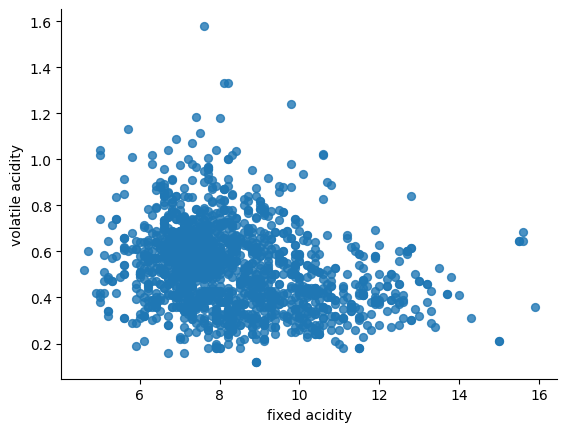

In [14]:
# @title fixed acidity vs volatile acidity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='fixed acidity', y='volatile acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

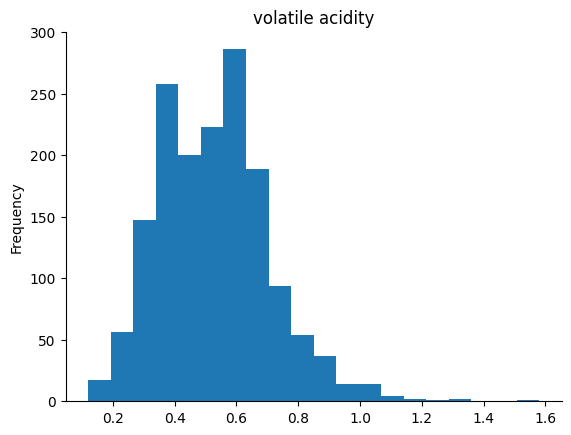

In [13]:
# @title volatile acidity

from matplotlib import pyplot as plt
df['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

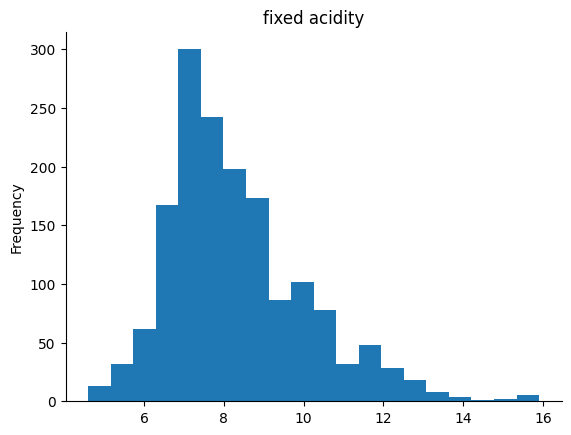

In [12]:
# @title fixed acidity

from matplotlib import pyplot as plt
df['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Separate features and target variable
X = df.drop(columns=['quality'])
y = df['quality']

# Handling missing values
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocessing training and testing data
X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocess_pipeline.transform(X_test)


In [6]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_preprocessed, y_train)


DecisionTreeClassifier()

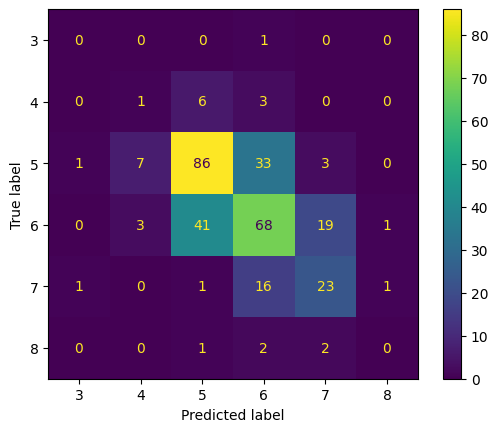

(0.55625,
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.09      0.10      0.10        10\n           5       0.64      0.66      0.65       130\n           6       0.55      0.52      0.53       132\n           7       0.49      0.55      0.52        42\n           8       0.00      0.00      0.00         5\n\n    accuracy                           0.56       320\n   macro avg       0.30      0.30      0.30       320\nweighted avg       0.55      0.56      0.55       320\n',
 array([[ 0,  0,  0,  1,  0,  0],
        [ 0,  1,  6,  3,  0,  0],
        [ 1,  7, 86, 33,  3,  0],
        [ 0,  3, 41, 68, 19,  1],
        [ 1,  0,  1, 16, 23,  1],
        [ 0,  0,  1,  2,  2,  0]]))

In [7]:
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()
    return accuracy, report, confusion_mat

evaluate_model(classifier, X_test_preprocessed, y_test)


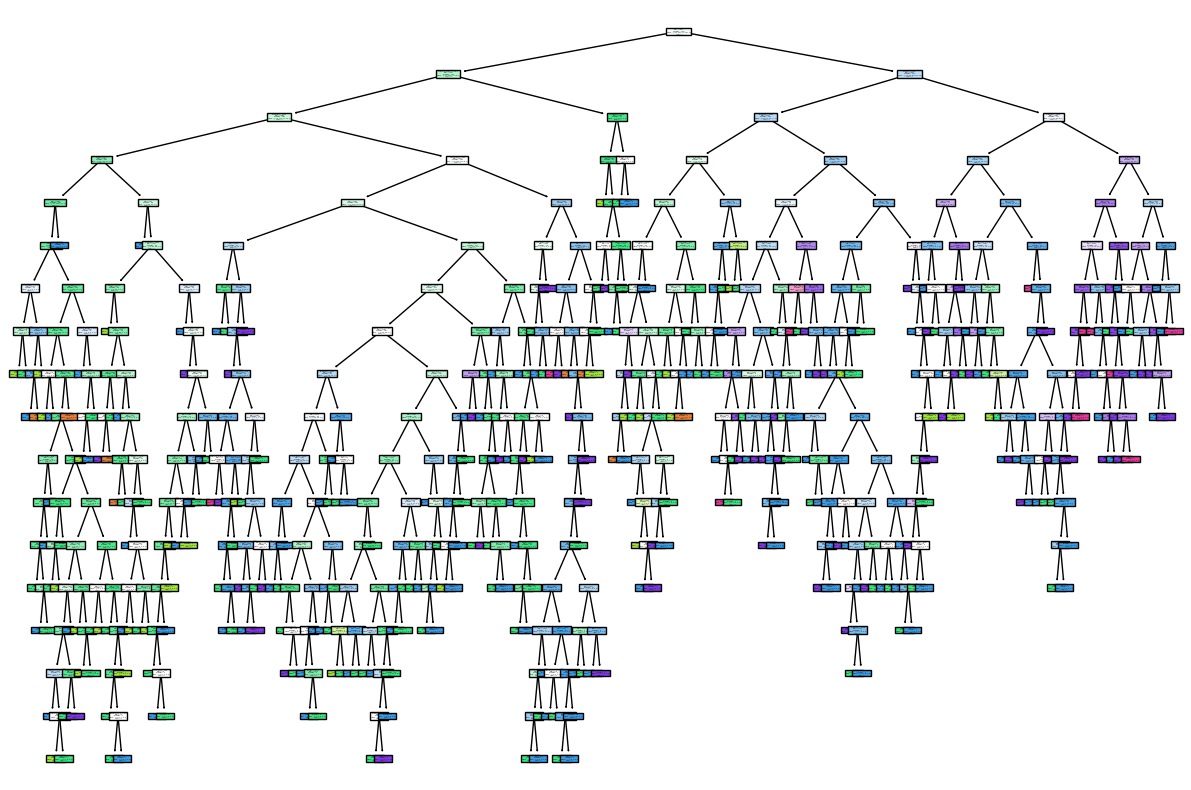

In [10]:
def visualize_tree(classifier, feature_names):
    class_names = [str(cls) for cls in classifier.classes_]
    plt.figure(figsize=(15, 10))
    plot_tree(classifier, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

feature_names = list(df.columns[:-1])
visualize_tree(classifier, feature_names)

